# Procedure
1. Data import
2. Normarize & One-hot encording
3. Create Model
4. Deep Learning
5. Check history(Graph)
6. Evaluate

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Google DriveからColabにコピーして解凍するやり方
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/train_sound_1.zip" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/train_sound_2.zip" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/train_sound_3.zip" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/test_sound_1.zip" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/test_sound_2.zip" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/test_sound_3.zip" .

In [3]:
!unzip "/content/train_sound_1.zip"
!unzip "/content/train_sound_2.zip"
!unzip "/content/train_sound_3.zip"
!unzip "/content/test_sound_1.zip"
!unzip "/content/test_sound_2.zip"
!unzip "/content/test_sound_3.zip"

Archive:  /content/train_sound_1.zip
   creating: train_sound_1/
  inflating: train_sound_1/train_0.au  
  inflating: train_sound_1/train_1.au  
  inflating: train_sound_1/train_10.au  
  inflating: train_sound_1/train_100.au  
  inflating: train_sound_1/train_101.au  
  inflating: train_sound_1/train_102.au  
  inflating: train_sound_1/train_103.au  
  inflating: train_sound_1/train_104.au  
  inflating: train_sound_1/train_105.au  
  inflating: train_sound_1/train_106.au  
  inflating: train_sound_1/train_107.au  
  inflating: train_sound_1/train_108.au  
  inflating: train_sound_1/train_109.au  
  inflating: train_sound_1/train_11.au  
  inflating: train_sound_1/train_110.au  
  inflating: train_sound_1/train_111.au  
  inflating: train_sound_1/train_112.au  
  inflating: train_sound_1/train_113.au  
  inflating: train_sound_1/train_114.au  
  inflating: train_sound_1/train_115.au  
  inflating: train_sound_1/train_116.au  
  inflating: train_sound_1/train_117.au  
  inflating: trai

In [4]:
!ls

drive		  test_sound_2	    train_sound_1      train_sound_3
sample_data	  test_sound_2.zip  train_sound_1.zip  train_sound_3.zip
test_sound_1	  test_sound_3	    train_sound_2
test_sound_1.zip  test_sound_3.zip  train_sound_2.zip


In [5]:
import os
os.chdir("/content")
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/train_master.tsv" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/label_master.tsv" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210823_音楽ラベリング/sample_submit.tsv" .

In [6]:
import pandas as pd

train_master = pd.read_csv("/content/train_master.tsv", sep='\t')
train_master.head(5)

,file_name,label_id
0,train_0.au,8
1,train_1.au,0
2,train_2.au,5
3,train_3.au,3
4,train_4.au,3


In [7]:
label_master = pd.read_csv("/content/label_master.tsv", sep='\t')
label_master.head(10)

,label_name,label_id
0,blues,0
1,classical,1
2,country,2
3,disco,3
4,hiphop,4
5,jazz,5
6,metal,6
7,pop,7
8,reggae,8
9,rock,9


In [8]:
import os
import cv2
import glob
from natsort import natsorted

In [9]:
import librosa
import numpy as np


os.chdir("/content/train_sound_1")                #階層移動
path_train_sound = natsorted(glob.glob("*"))   #階層内のPathを全取得


genre_x = np.zeros((0, 40))

for p in path_train_sound:    
   pathEach = p
   y, sr = librosa.load(pathEach)
   mfcc = librosa.feature.mfcc(y, sr, n_mfcc=40)
   mean = np.mean(mfcc, axis=1)
   genre_x = np.vstack((genre_x, mean))

train_sound1 = pd.DataFrame(genre_x)
#train_sound1["label"] = train_master["label_id"]

train_sound1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-232.536011,131.232620,2.679419,18.380754,11.350812,22.914648,-10.442412,16.765694,-15.254583,15.520480,-8.388180,8.027799,-3.774307,3.124079,-1.401661,3.266289,-4.089113,2.948684,0.394903,0.013069,2.699402,0.387853,3.333580,0.074043,5.207280,-0.077982,4.469802,3.073621,0.277748,-1.079565,-3.949149,0.411445,1.970893,2.505199,-0.752057,-0.449589,-1.218822,0.966208,-1.704319,-2.361720
1,-86.237152,91.961273,-23.417446,68.262482,-3.887737,22.747169,-9.899862,16.890066,-11.391862,18.431488,-7.011703,10.761971,-11.946139,0.990867,-5.927924,5.319791,-6.135271,1.949598,-5.093714,-0.671631,-0.501325,1.069546,-0.854068,1.921638,3.248943,-2.130625,8.221537,0.378401,-4.359388,0.063865,-2.287292,-4.319756,-2.596911,-2.358163,4.298954,0.091364,0.772607,-4.029979,1.475703,-4.180201
2,-261.820526,139.550018,-17.106535,49.890312,-5.859791,19.839077,1.865228,5.707028,-7.827316,-0.433149,-1.252329,-2.196244,4.468629,-0.325297,0.102884,-0.282775,1.986865,-2.635558,-1.153578,-5.372205,0.391380,2.979607,2.968806,-0.243920,2.321796,1.374333,-1.953055,0.450675,-1.103466,-0.709207,-1.618534,1.114530,0.893021,-1.396069,-3.069023,-3.105031,-1.000202,0.345240,-0.121345,-2.725007
3,-106.258240,105.635910,-5.515384,50.073448,1.234769,36.994591,-9.632421,23.998070,-8.683135,14.959825,-2.546394,9.765832,-0.926001,3.864904,-1.554074,3.566459,1.535014,2.095073,-4.001732,-2.622491,-3.101024,-6.125432,-3.406981,-3.389890,-0.441838,1.850605,-2.516085,-1.181665,0.219818,-1.443097,1.965193,-5.497602,-1.737761,-2.487826,0.841920,-0.057944,0.233750,-2.340808,-0.317628,-2.281734
4,-95.221481,82.231483,-26.240187,37.515526,-16.373232,25.290831,-21.813601,21.809156,-20.075266,16.302641,-16.127451,14.437364,-11.915865,7.169275,-11.673985,5.082489,-10.230156,4.795676,-6.014397,-0.236137,-4.341830,-3.454575,-2.210467,-5.456295,-1.914619,-5.505883,-4.055267,-2.731394,-3.995993,2.215711,-4.194221,-2.143700,-5.838233,-0.383445,0.702783,-0.690960,2.047981,-3.119342,-5.117031,-4.512360


In [10]:
os.chdir("/content/train_sound_2")                #階層移動
path_train_sound = natsorted(glob.glob("*"))   #階層内のPathを全取得


genre_x = np.zeros((0, 40))

for p in path_train_sound:    
   pathEach = p
   y, sr = librosa.load(pathEach)
   mfcc = librosa.feature.mfcc(y, sr, n_mfcc=40)
   mean = np.mean(mfcc, axis=1)
   genre_x = np.vstack((genre_x, mean))

train_sound2 = pd.DataFrame(genre_x)

train_sound2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-1.639786,73.393372,-15.902726,55.797817,-1.897447,34.024055,-8.308772,32.758251,-9.702256,20.829285,-9.034417,13.955179,-9.579517,4.954587,-6.612502,6.480688,-6.442894,2.228224,-3.008769,1.980234,-6.218295,-0.322983,-2.811929,-1.499943,-4.746127,-2.537063,-2.923975,-2.350265,0.001142,-3.016031,-1.906254,-2.120776,-0.729113,-1.417601,-0.243298,-2.450845,-2.480196,-1.067661,-1.206720,-3.321430
1,-74.186089,104.598427,-8.379662,49.651127,-9.369984,21.442776,-16.329868,18.780682,-13.064760,18.465389,-14.948746,6.881843,-15.326596,4.778063,-11.097589,4.736111,-2.812528,6.798242,-5.803802,-3.767237,-7.056135,-5.296155,-3.622804,-3.435979,-5.322946,-5.936469,-1.960819,-3.889800,-4.155446,-7.140930,-1.386201,-2.479533,-0.237177,-3.056347,-1.312263,-2.234823,-1.388771,-3.858261,-1.332465,-1.521844
2,-142.779709,103.128288,-15.233027,38.275749,-13.001493,2.755908,-1.665307,-3.438277,-4.456930,-9.294200,-10.123964,-2.115065,-4.457651,-7.910070,-3.740126,0.514647,-5.025696,0.311581,1.577879,1.209419,1.031831,1.051396,-1.480073,-2.351180,-2.482871,-0.200348,2.841250,2.272597,-0.551571,-3.077046,2.587341,7.299392,-0.609307,-2.088124,-4.092513,-1.332381,-1.426473,-4.156878,1.865961,2.925630
3,-71.267502,97.742195,-18.385057,8.590289,5.192099,-0.943534,0.454823,1.619770,-4.787409,0.064720,-0.551714,-4.455987,-5.318957,-4.782975,-4.600167,-5.975597,-2.896801,-3.432506,-2.565010,-3.041235,-2.963724,-2.819091,-1.108326,-1.890119,-2.767030,-1.819531,-1.746562,0.149658,-3.803229,-7.302364,-5.293069,-0.347357,1.068443,0.031021,-1.307380,-3.024051,-3.519140,-4.360553,-3.764350,-1.731687
4,-44.714558,55.050488,27.163013,19.509436,14.692773,3.190221,5.497242,1.427716,4.497019,1.376466,-1.651968,-3.523048,-7.915641,-3.532647,-8.196501,-3.397619,-2.654637,4.296932,1.359484,-0.172349,-6.421507,-7.634474,-2.006000,3.302762,6.716901,0.370280,-8.268633,-9.173772,-3.551615,1.253449,-2.276586,-7.796605,-6.384068,0.770664,2.829746,2.695561,-0.872628,-3.495409,-6.374598,-4.710158


In [11]:
os.chdir("/content/train_sound_3")                #階層移動
path_train_sound = natsorted(glob.glob("*"))   #階層内のPathを全取得


genre_x = np.zeros((0, 40))

for p in path_train_sound:    
   pathEach = p
   y, sr = librosa.load(pathEach)
   mfcc = librosa.feature.mfcc(y, sr, n_mfcc=40)
   mean = np.mean(mfcc, axis=1)
   genre_x = np.vstack((genre_x, mean))

train_sound3 = pd.DataFrame(genre_x)

train_sound3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-104.801987,64.014046,28.808458,10.573614,15.186722,13.067346,8.022514,5.242740,6.753813,5.128404,4.453504,4.473663,3.357501,2.427599,0.191139,-1.519864,-2.561921,-1.190952,-2.197093,-1.882875,-5.078432,-2.720304,-3.700047,-3.706589,1.110037,5.004678,4.803142,6.093822,1.596068,-1.312598,-1.031798,-0.950306,1.024086,0.613189,-2.176098,-0.064173,-0.891312,-0.547191,1.794371,-0.268574
1,-217.095657,136.186264,-10.360360,51.376572,2.601409,15.120926,-0.667131,12.283902,-6.230838,7.798332,-5.416997,3.614486,-2.797229,-0.338397,-0.550961,0.367356,-2.240791,-2.492383,4.185312,0.336304,-6.173588,-8.407001,-1.193828,-1.336609,-1.145553,-3.821538,-3.583596,-8.082273,-3.302121,5.872162,1.025113,-10.820648,-3.213873,1.377587,-1.913239,-1.492415,-0.536308,-1.895138,-4.367979,-6.569837
2,-118.040009,74.170738,8.276100,15.462989,6.169437,8.448750,4.112010,5.716955,-1.972500,3.159259,5.055857,-1.113593,2.443444,-1.423238,-4.734302,-6.373156,-5.746764,-6.262014,-4.509339,-0.994912,-1.322127,-4.409582,-3.088572,-4.962516,-4.732682,-1.652341,-3.633903,-1.843943,-0.563536,-4.194444,-5.743554,-6.563731,-3.032152,-0.826531,-2.211272,-2.591686,-3.293377,-1.961883,-2.258761,-2.245361
3,-44.996277,69.734795,11.883739,8.178461,12.600216,7.753453,11.300781,0.249688,9.666492,2.812353,3.851914,-0.851094,2.099615,1.125279,0.009115,0.751723,-1.472157,3.667337,4.462533,4.200405,-2.220353,-2.487012,1.533005,2.547042,-0.194463,0.439361,-1.062499,-0.887486,1.333351,0.307191,-2.143754,-3.077152,1.095146,1.801951,1.883913,1.749329,3.438861,2.530409,-1.103655,-3.462489
4,-164.594574,142.707443,-41.489227,41.226192,16.171186,-5.588592,7.633070,5.620200,0.810726,-10.478096,-2.344436,-0.496347,-3.065764,-0.593957,1.148264,0.735319,1.047548,1.983874,3.497196,5.303597,1.474025,-5.340030,-6.464197,-1.445303,-3.103138,-6.032490,-2.551242,1.825085,-3.397552,-10.259067,-5.473857,0.749812,-1.582881,-3.770149,-5.490859,-8.914213,-6.090858,-2.810275,1.654278,3.796443


In [12]:
train = pd.concat([train_sound1, train_sound2, train_sound3]).reset_index(drop=True)

train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-232.536011,131.232620,2.679419,18.380754,11.350812,22.914648,-10.442412,16.765694,-15.254583,15.520480,-8.388180,8.027799,-3.774307,3.124079,-1.401661,3.266289,-4.089113,2.948684,0.394903,0.013069,2.699402,0.387853,3.333580,0.074043,5.207280,-0.077982,4.469802,3.073621,0.277748,-1.079565,-3.949149,0.411445,1.970893,2.505199,-0.752057,-0.449589,-1.218822,0.966208,-1.704319,-2.361720
1,-86.237152,91.961273,-23.417446,68.262482,-3.887737,22.747169,-9.899862,16.890066,-11.391862,18.431488,-7.011703,10.761971,-11.946139,0.990867,-5.927924,5.319791,-6.135271,1.949598,-5.093714,-0.671631,-0.501325,1.069546,-0.854068,1.921638,3.248943,-2.130625,8.221537,0.378401,-4.359388,0.063865,-2.287292,-4.319756,-2.596911,-2.358163,4.298954,0.091364,0.772607,-4.029979,1.475703,-4.180201
2,-261.820526,139.550018,-17.106535,49.890312,-5.859791,19.839077,1.865228,5.707028,-7.827316,-0.433149,-1.252329,-2.196244,4.468629,-0.325297,0.102884,-0.282775,1.986865,-2.635558,-1.153578,-5.372205,0.391380,2.979607,2.968806,-0.243920,2.321796,1.374333,-1.953055,0.450675,-1.103466,-0.709207,-1.618534,1.114530,0.893021,-1.396069,-3.069023,-3.105031,-1.000202,0.345240,-0.121345,-2.725007
3,-106.258240,105.635910,-5.515384,50.073448,1.234769,36.994591,-9.632421,23.998070,-8.683135,14.959825,-2.546394,9.765832,-0.926001,3.864904,-1.554074,3.566459,1.535014,2.095073,-4.001732,-2.622491,-3.101024,-6.125432,-3.406981,-3.389890,-0.441838,1.850605,-2.516085,-1.181665,0.219818,-1.443097,1.965193,-5.497602,-1.737761,-2.487826,0.841920,-0.057944,0.233750,-2.340808,-0.317628,-2.281734
4,-95.221481,82.231483,-26.240187,37.515526,-16.373232,25.290831,-21.813601,21.809156,-20.075266,16.302641,-16.127451,14.437364,-11.915865,7.169275,-11.673985,5.082489,-10.230156,4.795676,-6.014397,-0.236137,-4.341830,-3.454575,-2.210467,-5.456295,-1.914619,-5.505883,-4.055267,-2.731394,-3.995993,2.215711,-4.194221,-2.143700,-5.838233,-0.383445,0.702783,-0.690960,2.047981,-3.119342,-5.117031,-4.512360


In [13]:
os.chdir("/content/test_sound_1")         
path_test_sound = natsorted(glob.glob("*"))   


genre_x = np.zeros((0, 40))

for p in path_test_sound:    
   pathEach = p
   y, sr = librosa.load(pathEach)
   mfcc = librosa.feature.mfcc(y, sr, n_mfcc=40)
   mean = np.mean(mfcc, axis=1)
   genre_x = np.vstack((genre_x, mean))

test_sound1 = pd.DataFrame(genre_x)
#train_sound1["label"] = train_master["label_id"]

test_sound1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-25.081139,60.824257,-4.187146,14.850026,6.798275,6.101046,15.452723,3.783457,5.656759,10.245465,0.862812,4.186316,0.929878,3.256351,0.217885,2.697329,0.703059,0.893560,0.358786,-0.006134,0.250258,3.831449,-1.064190,0.414202,-3.447618,-2.341420,-3.675581,-0.983104,-0.579519,3.231677,3.697621,3.019409,-1.062014,-0.335183,-1.738287,-0.531080,-2.211928,0.133250,-0.483008,0.170524
1,-169.175095,110.450371,-8.545039,43.888599,0.316972,26.636770,-14.361242,13.035166,-11.153996,8.111965,-7.677317,10.930495,-8.167287,2.806923,-6.424585,1.097553,-4.248909,4.349437,-3.452688,1.232628,3.540695,2.307463,0.313266,-2.594340,-0.193723,-1.572537,-0.057832,-3.494582,-1.518284,0.565126,-1.847035,-5.870779,-1.767681,-4.535778,-0.166687,-0.808596,-1.573338,-1.888454,-1.315404,-3.269169
2,-198.935211,92.613861,-19.531054,39.532722,-0.644653,33.590385,-6.467283,27.532307,-2.398014,15.002975,-2.991629,14.894032,-3.387703,9.289010,0.835909,8.286860,-0.588839,-1.615389,1.254428,3.049958,-3.040480,-2.225067,1.161657,0.731005,2.872217,2.122157,-1.678250,-6.589316,-3.924817,-4.104373,0.294580,1.678634,2.151266,-2.362564,-1.815792,-6.751423,-3.061182,-2.141159,2.552419,0.024155
3,10.046751,74.125839,-32.239403,62.773540,-23.328131,30.035770,-14.879455,20.162073,-12.150338,19.191313,-14.975233,18.804697,-12.281503,11.290201,-9.484274,7.920748,-5.624405,4.651730,-5.290328,6.834479,-5.921043,4.418534,-0.472158,1.070871,0.012544,0.773257,-1.205759,-0.591960,-2.913276,-2.872686,0.025680,0.157670,-1.909162,-4.167682,-2.597568,-4.750777,-3.389908,-1.315602,-0.560830,-3.609716
4,-402.196014,154.012802,-15.234305,15.306429,-3.071419,-3.169816,-9.762609,-17.315071,-12.308243,-7.911025,-7.106223,-0.299758,1.531477,-1.461338,-1.726164,1.848421,5.031434,-0.757560,-0.139755,-2.850242,0.111503,0.747869,-1.697896,-1.099036,0.434764,1.466058,1.965141,0.163015,2.061301,1.234686,-4.006407,1.080735,3.793081,3.045867,0.296651,0.730371,-1.056923,2.174516,6.909965,-3.314213


In [14]:
os.chdir("/content/test_sound_2")         
path_test_sound = natsorted(glob.glob("*"))   


genre_x = np.zeros((0, 40))

for p in path_test_sound:    
   pathEach = p
   y, sr = librosa.load(pathEach)
   mfcc = librosa.feature.mfcc(y, sr, n_mfcc=40)
   mean = np.mean(mfcc, axis=1)
   genre_x = np.vstack((genre_x, mean))

test_sound2 = pd.DataFrame(genre_x)
#train_sound1["label"] = train_master["label_id"]

test_sound2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-311.587250,148.711868,-33.466099,10.318862,-12.851102,1.214799,-12.890239,0.799196,-9.718398,2.035126,-5.117127,6.726269,4.600521,3.776890,1.283526,1.242797,-0.097337,1.501247,0.380252,-3.007312,0.641866,1.975990,4.406902,0.413556,0.608725,-1.212907,0.637256,1.936815,-1.922766,-3.706581,5.040909,6.172459,-0.136848,-3.251751,-5.234348,-6.020111,-1.074923,3.418596,4.051842,1.286442
1,9.625917,76.331024,-31.260973,56.872505,-20.735949,27.227886,-16.627785,19.355600,-13.902421,19.654564,-16.051170,17.480591,-12.938000,11.706330,-11.175488,5.462623,-8.572810,4.100471,-4.408443,8.822039,-5.298547,2.004810,0.155796,1.250162,-0.984253,-0.644724,-2.073041,-1.279622,-5.431817,-3.525016,-0.044969,0.540274,-0.156113,-4.341735,-1.827203,-2.973884,-1.030354,-1.164470,-0.580514,-3.707718
2,-34.164890,40.395576,17.487513,13.417416,13.253479,7.454610,18.185043,2.726156,4.357525,5.832929,-1.136877,3.118074,2.421972,-2.075919,-1.267184,0.154901,2.322006,4.309858,2.133552,2.950944,-0.374059,-1.897183,1.108893,-2.520505,-1.236019,1.115409,-1.355260,-1.599380,-2.282346,-2.590410,-1.385721,-0.358342,-1.641467,0.355355,0.607548,2.003736,0.968677,1.101654,2.672380,0.872933
3,-100.384117,104.688103,-57.247860,56.568504,-5.551697,22.824835,-6.165266,23.091785,-19.065331,17.791447,-13.772540,9.958725,-14.852404,0.340111,-7.333623,6.971109,-12.668804,-0.556885,-11.754225,-1.540815,-7.614774,-5.271627,-7.382371,-4.042371,-5.486094,-4.584451,-3.606233,-1.231614,-1.029735,-2.244324,-0.974076,0.479529,2.353600,-0.628555,-1.309811,-2.826451,-1.389844,-0.529114,0.953867,-2.091878
4,-163.530350,65.972443,5.347551,41.905540,7.031604,5.499666,8.924790,2.679377,-0.175658,5.169557,10.489634,3.339697,3.841381,2.545494,5.697989,-1.081032,-1.760361,-5.186886,-5.654775,-9.772273,-7.115432,-3.833171,-2.471867,-0.115932,-5.185138,-7.038753,-2.145009,-3.262434,-5.722292,-1.567350,-1.201523,1.379694,-3.584672,-2.947342,-2.798751,-7.259326,-2.292746,0.766411,3.395857,-2.556395


In [15]:
os.chdir("/content/test_sound_3")         
path_test_sound = natsorted(glob.glob("*"))   


genre_x = np.zeros((0, 40))

for p in path_test_sound:    
   pathEach = p
   y, sr = librosa.load(pathEach)
   mfcc = librosa.feature.mfcc(y, sr, n_mfcc=40)
   mean = np.mean(mfcc, axis=1)
   genre_x = np.vstack((genre_x, mean))

test_sound3 = pd.DataFrame(genre_x)
#train_sound1["label"] = train_master["label_id"]

test_sound3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-77.002876,68.319992,-0.647169,30.710213,3.951058,5.495327,3.387722,3.047429,5.650207,4.725110,4.285637,3.461019,2.888073,1.437007,-2.297129,-2.565035,-5.015092,-3.964157,-5.721850,-0.039239,-2.897420,-2.322192,2.495686,1.449742,-1.169732,-1.475706,-1.774678,-0.315765,-1.730207,-5.905834,-0.370352,0.238929,-2.767676,-3.010871,-1.176040,-1.803382,-2.866492,-4.493739,-4.208393,-2.114623
1,-121.489944,89.585800,23.790337,32.785526,8.869473,-2.601478,6.639092,1.785218,-2.936793,-3.094965,-0.695944,-5.426029,-6.542308,-4.702367,-3.288922,-6.456261,-6.642507,-4.406873,-3.161338,-3.985337,-4.248077,-4.739248,-5.091746,-5.330863,-5.865602,-2.121493,1.025326,0.982061,-3.178322,-7.483842,-5.446998,-3.240811,0.116069,1.721504,-3.656223,-3.943476,-2.652488,-3.182745,-4.189342,-1.875803
2,-14.543533,65.195236,-19.888025,31.507599,-4.813732,11.862863,9.992636,5.959980,-3.795433,9.389119,-4.380745,3.344095,-4.446671,-1.271667,-0.836886,-2.193958,-4.731374,-2.610662,-7.465981,0.231176,-3.340767,-0.258612,3.573716,2.118227,-1.786032,-1.630075,-7.137822,-2.491529,0.964575,-2.487026,-9.182896,-2.424101,-0.355897,1.670886,-2.275119,-3.444490,-3.874173,-2.778360,-2.059256,-3.339417
3,-199.544205,150.090912,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286495,-0.759187,8.137607,-3.200653,6.079319,-2.480174,-1.079305,-2.870789,0.780873,-3.319597,0.636965,-0.619121,-3.407449,-1.497070,-0.052236,-1.860378,-4.708420,-3.922397,-6.646779,-2.896451,-3.225220,-0.269411,-3.817974,-2.821436,-4.206203,-2.698562,-3.844217,-2.523301,-4.936952,-5.957228,-6.616440,-6.393889,-1.493311
4,-104.675392,87.750946,-33.251312,48.480877,-28.911016,22.519138,-24.983646,20.539007,-12.067500,18.250483,-15.188066,10.300733,-13.888823,10.287513,-4.698552,9.937948,-5.628077,4.790154,-11.673641,2.964128,-0.692090,0.864297,-6.689293,-1.789015,-4.254666,-0.133264,-1.500714,0.659746,0.532163,-0.476698,-1.412592,-1.574725,0.084837,-0.693896,1.462841,-0.735302,-1.516676,-2.384437,-1.361870,-0.719340


In [16]:
test = pd.concat([test_sound1, test_sound2, test_sound3]).reset_index(drop=True)

test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-25.081139,60.824257,-4.187146,14.850026,6.798275,6.101046,15.452723,3.783457,5.656759,10.245465,0.862812,4.186316,0.929878,3.256351,0.217885,2.697329,0.703059,0.893560,0.358786,-0.006134,0.250258,3.831449,-1.064190,0.414202,-3.447618,-2.341420,-3.675581,-0.983104,-0.579519,3.231677,3.697621,3.019409,-1.062014,-0.335183,-1.738287,-0.531080,-2.211928,0.133250,-0.483008,0.170524
1,-169.175095,110.450371,-8.545039,43.888599,0.316972,26.636770,-14.361242,13.035166,-11.153996,8.111965,-7.677317,10.930495,-8.167287,2.806923,-6.424585,1.097553,-4.248909,4.349437,-3.452688,1.232628,3.540695,2.307463,0.313266,-2.594340,-0.193723,-1.572537,-0.057832,-3.494582,-1.518284,0.565126,-1.847035,-5.870779,-1.767681,-4.535778,-0.166687,-0.808596,-1.573338,-1.888454,-1.315404,-3.269169
2,-198.935211,92.613861,-19.531054,39.532722,-0.644653,33.590385,-6.467283,27.532307,-2.398014,15.002975,-2.991629,14.894032,-3.387703,9.289010,0.835909,8.286860,-0.588839,-1.615389,1.254428,3.049958,-3.040480,-2.225067,1.161657,0.731005,2.872217,2.122157,-1.678250,-6.589316,-3.924817,-4.104373,0.294580,1.678634,2.151266,-2.362564,-1.815792,-6.751423,-3.061182,-2.141159,2.552419,0.024155
3,10.046751,74.125839,-32.239403,62.773540,-23.328131,30.035770,-14.879455,20.162073,-12.150338,19.191313,-14.975233,18.804697,-12.281503,11.290201,-9.484274,7.920748,-5.624405,4.651730,-5.290328,6.834479,-5.921043,4.418534,-0.472158,1.070871,0.012544,0.773257,-1.205759,-0.591960,-2.913276,-2.872686,0.025680,0.157670,-1.909162,-4.167682,-2.597568,-4.750777,-3.389908,-1.315602,-0.560830,-3.609716
4,-402.196014,154.012802,-15.234305,15.306429,-3.071419,-3.169816,-9.762609,-17.315071,-12.308243,-7.911025,-7.106223,-0.299758,1.531477,-1.461338,-1.726164,1.848421,5.031434,-0.757560,-0.139755,-2.850242,0.111503,0.747869,-1.697896,-1.099036,0.434764,1.466058,1.965141,0.163015,2.061301,1.234686,-4.006407,1.080735,3.793081,3.045867,0.296651,0.730371,-1.056923,2.174516,6.909965,-3.314213


In [17]:
print(train.shape)
print(test.shape)

(500, 40)
(500, 40)


In [18]:
x = train
y = train_master["label_id"]

In [19]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()  # 標準化のためのスケーラー
scaler.fit(x)  # パラメータの計算
x = scaler.transform(x)  # データの変換
print(x[:10])

t = np_utils.to_categorical(y)  # ラベルをone-hot表現に変換
print(t[:10])

[[-8.57332452e-01  1.00697563e+00  5.37454116e-01 -1.08358418e+00
   1.07539480e+00  6.70976393e-01 -5.59654131e-01  6.45413182e-01
  -1.01774256e+00  9.57379340e-01 -3.85397121e-01  5.37649047e-01
   1.44947330e-01  2.47506275e-01  4.99366404e-01  4.44940661e-01
  -3.56241270e-02  5.88814178e-01  6.73034064e-01  2.85458859e-01
   1.29956676e+00  4.10374587e-01  1.39462915e+00  3.83509372e-01
   1.98262311e+00  5.65266671e-01  1.90106331e+00  1.44305515e+00
   4.99895236e-01  2.00362587e-01 -7.82489580e-01  6.29697673e-01
   1.01462015e+00  1.47942774e+00  9.97163756e-02  6.63745378e-01
   1.09747873e-01  1.19466414e+00 -2.46443770e-01 -2.14003197e-01]
 [ 5.65213243e-01 -2.67031228e-01 -6.75907042e-01  1.86885036e+00
  -2.11543476e-01  6.57029483e-01 -5.04221192e-01  6.57400229e-01
  -5.45697007e-01  1.32446531e+00 -1.81703089e-01  9.54937557e-01
  -1.19800787e+00 -1.83361747e-01 -4.28300903e-01  9.08770286e-01
  -4.86128115e-01  3.25721492e-01 -7.63498855e-01  9.86608419e-02
   4.6897

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(512, input_dim=40)) 
model.add(Activation('relu')) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5))
model.add(Dense(10)) 
model.add(Activation('sigmoid')) 
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               20992     
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0

In [22]:
history = model.fit(x_train, t_train, epochs=300, batch_size=50, validation_data=(x_test, t_test))

Epoch 1/300
8/8 [==============================] - 3s 35ms/step - loss: 2.3234 - accuracy: 0.1227 - val_loss: 2.2664 - val_accuracy: 0.2080
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 2.2780 - accuracy: 0.1360 - val_loss: 2.2209 - val_accuracy: 0.2880
Epoch 3/300
8/8 [==============================] - 0s 6ms/step - loss: 2.2330 - accuracy: 0.1760 - val_loss: 2.1814 - val_accuracy: 0.3200
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 2.2066 - accuracy: 0.2320 - val_loss: 2.1427 - val_accuracy: 0.3440
Epoch 5/300
8/8 [==============================] - 0s 7ms/step - loss: 2.1431 - accuracy: 0.2747 - val_loss: 2.1073 - val_accuracy: 0.3600
Epoch 6/300
8/8 [==============================] - 0s 7ms/step - loss: 2.1307 - accuracy: 0.2533 - val_loss: 2.0748 - val_accuracy: 0.3680
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 2.0700 - accuracy: 0.3093 - val_loss: 2.0431 - val_accuracy: 0.3760
Epoch 8/300
8/8 [=========

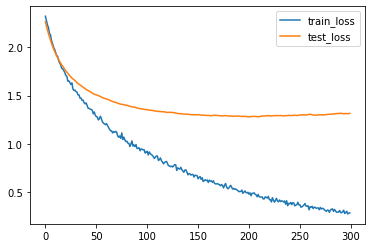

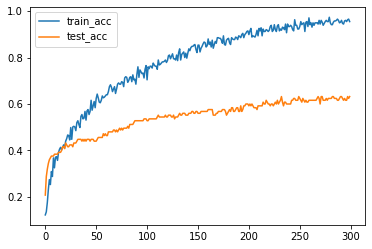

In [23]:
import matplotlib.pyplot as plt

train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.plot(np.arange(len(train_loss)), train_loss, label="train_loss")
plt.plot(np.arange(len(test_loss)), test_loss, label="test_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label="train_acc")
plt.plot(np.arange(len(train_acc)), test_acc, label="test_acc")
plt.legend()
plt.show()

In [24]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 1.3151 - accuracy: 0.6320
1.3151428699493408 0.6320000290870667


In [25]:
sample_submit = pd.read_csv("/content/sample_submit.tsv", sep='\t', header=None)

In [ ]:
sample_submit.head()

,0,1
0,test_0.au,2
1,test_1.au,6
2,test_2.au,2
3,test_3.au,0
4,test_4.au,4


In [28]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()  # 標準化のためのスケーラー
scaler.fit(test)  # パラメータの計算
test = scaler.transform(test)  # データの変換
print(test[:10])

[[ 1.22635679 -1.19842075  0.21845631 -1.28298883  0.61278514 -0.71305133
   2.05841595 -0.60587821  1.51862756  0.34221291  1.03791477 -0.03669893
   0.93920126  0.3146285   0.84688504  0.35988539  1.03409667  0.15053649
   0.77167987  0.28807129  0.65088756  1.36429001  0.2208795   0.49380057
  -0.65413241 -0.17543089 -0.78740526  0.11719834  0.20911775  1.64425666
   1.50260879  1.35753426  0.10774549  0.52566267 -0.15094508  0.57429068
  -0.32844314  0.86521382  0.22948267  0.64302781]
 [-0.25239968  0.36288669  0.01901328  0.48716631  0.09732775  1.04934932
  -0.89972202  0.27192478 -0.48863915  0.0732276  -0.20682341  0.94516872
  -0.51750366  0.22576496 -0.51905687  0.02070949 -0.05363198  1.03102676
  -0.26406801  0.59802787  1.5102614   0.9219797   0.59005632 -0.3701847
   0.31266101  0.07050578  0.42903795 -0.69425466 -0.11664831  0.79358649
  -0.18348747 -1.17880447 -0.14603329 -0.91372354  0.42757208  0.45665913
  -0.04057677 -0.03457867 -0.08421123 -0.57755338]
 [-0.557811

In [29]:
pred = model.predict(test)
pred_num = np.argmax(pred, axis=1)

In [30]:
pred_num

array([7, 8, 8, 6, 1, 0, 8, 2, 5, 2, 6, 0, 5, 7, 2, 2, 9, 2, 7, 7, 6, 9,
       9, 6, 5, 5, 1, 1, 8, 0, 7, 0, 7, 5, 0, 5, 8, 9, 8, 9, 1, 4, 5, 1,
       9, 0, 4, 8, 2, 5, 5, 1, 5, 6, 1, 4, 9, 8, 2, 4, 0, 8, 5, 6, 8, 0,
       7, 4, 4, 3, 2, 7, 1, 4, 7, 6, 6, 2, 9, 1, 7, 3, 4, 4, 2, 8, 3, 0,
       1, 9, 3, 9, 7, 6, 2, 0, 0, 3, 6, 0, 7, 6, 6, 8, 7, 0, 9, 1, 5, 5,
       2, 4, 9, 0, 1, 2, 0, 2, 8, 2, 6, 4, 2, 1, 8, 2, 8, 0, 2, 4, 4, 1,
       4, 6, 6, 1, 0, 2, 9, 1, 1, 8, 1, 7, 7, 8, 4, 2, 5, 3, 4, 7, 0, 7,
       5, 1, 9, 7, 8, 9, 8, 3, 4, 8, 4, 9, 4, 1, 6, 7, 6, 4, 9, 5, 3, 3,
       2, 4, 1, 0, 6, 3, 6, 6, 0, 1, 0, 0, 4, 2, 5, 0, 2, 0, 1, 1, 8, 6,
       3, 1, 2, 2, 0, 6, 2, 1, 6, 8, 2, 7, 5, 6, 1, 8, 7, 0, 5, 6, 2, 4,
       4, 0, 8, 3, 1, 1, 5, 9, 6, 0, 4, 3, 9, 4, 7, 6, 7, 9, 4, 5, 8, 0,
       5, 3, 6, 5, 6, 0, 3, 5, 3, 8, 1, 3, 1, 7, 8, 2, 4, 1, 9, 6, 9, 2,
       1, 7, 3, 6, 3, 5, 8, 5, 3, 1, 6, 7, 5, 2, 5, 4, 7, 2, 5, 1, 4, 9,
       7, 5, 0, 7, 7, 9, 3, 8, 1, 3, 8, 7, 8, 3, 6,

In [31]:
sample_submit[1] = pred_num 

In [32]:
sample_submit

,0,1
0,test_0.au,7
1,test_1.au,8
2,test_2.au,8
3,test_3.au,6
4,test_4.au,1
...,...,...
495,test_495.au,2
496,test_496.au,0
497,test_497.au,6
498,test_498.au,7


In [33]:
os.chdir("/content")

In [34]:
sample_submit.to_csv("submit01.tsv", sep='\t', index=None,header=None)